# Fashion MNIST Classification: 3 Layer CNN vs SVM
### Comparing the accuracy of a 3 layer Convolutional Neural Network and a Support Vector Machine
#### By Mark Hinds
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 
One of the goals of this project is to show the efficiency and effectiveness of neural networks over hyperplane based classification models. 

The follow labels indicate the type of fashion item:
    - 0: T-shirt/top
    - 1: Trouser
    - 2: Pullover
    - 3: Dress 
    - 4: Coat 
    - 5: Sandal
    - 6: Shirt
    - 7: Sneaker 
    - 8: Bag
    - 9: Ankle boot
    
The following resources were used to help build the model and plot graphs: 
1. https://www.tensorflow.org/tutorials/keras/classification
2. CNN Jupyter Notebook by Ross Beveridge
3. My previous hw for making plots
4. https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

## Importing Libraries

I will be utilizing 7 libaries: Pandas for initial dataframes, Numpy for array reshaping, SKlearn for our support vector machine model, Matplotlib plot plotting, and Tensorflow Keras for our primary CNN. 

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from keras.layers import Conv2D
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from sklearn import metrics

## Loading Data
Load the data from the keras library, and view the shape of it. 

In [2]:
#load data
fash = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#load training and testing data
(x_train, y_train), (x_test, y_test) = fash

In [4]:
#What's the shape of our data?
print("x_train shape: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_train.shape[1]

print ("Number of training examples: ", m_train)
print ("Number of testing examples: ",m_test)
print ("Height and Width of each image: ", num_px)

x_train shape:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)
Number of training examples:  60000
Number of testing examples:  10000
Height and Width of each image:  28


## Visualizing the Data

Here we will visualize what the images look like with their attached label. 

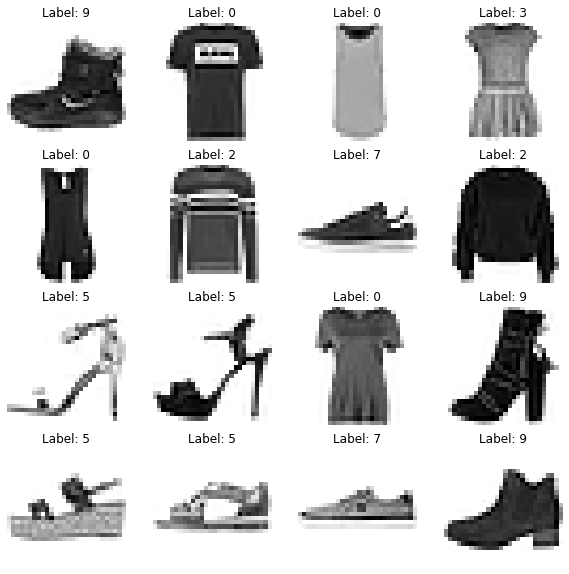

In [5]:
#Function source from Ross Beveridge
fig, axes = plt.subplots(4, 4, figsize=(10,10))

for i in range(4):
    for j in range(4):
        axes[i,j].imshow(x_train[i*4 + j, :, :], cmap='binary')
        axes[i,j].set_title("Label: " + str(y_train[i*4+j]))
        axes[i,j].axis('off')

plt.show()

## SVM Classification

We will first predict our model accuracy with a Support Vector Machine. When comparing minimal classes in a SVM, the model operates pretty quickly, however when running 9 features for classification on tens of thousands of images, the runtime increases quite a bit. 

In [10]:
#shape data to fit svm model
ntrain, nx, ny = x_train.shape
ntest, nx1, ny1 = x_test.shape
x_trainAdj = x_train.reshape((ntrain,nx*ny))
x_testAdj = x_test.reshape((ntest,nx1*ny1))

60000

In [13]:
#fit model
np.random.seed(345)
svmodel=svm.SVC(kernel='poly',degree=2)
svmodel.fit(x_trainAdj,y_train)

SVC(degree=2, kernel='poly')

In [14]:
#predict and calculate prediction
np.random.seed(345)
svmodel.predict([x_testAdj[0]])
y_pred = svmodel.predict(x_testAdj)
acc = metrics.accuracy_score(y_test, y_pred, normalize=True)
print('SVM accuracy is : ' + str(acc))

SVM accuracy is : 0.8692


## Setting up the Convolutional Neural Network

This is a 3 layer convolutional neural network. The benefit of running a CNN is it automatically detects important features with the passing of each layer and filter. Usually when adding more layers to a neural network, the model is able to fit more complex patterns, however this comes at the cost of increasing dimensionality. With this we can store more values in a weight which may cause our model to overfit.

In [16]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
trainX = x_train / 255.0
testX = x_test/ 255.0

#one hot encode y labels
trainY = to_categorical(y_train)
testY = to_categorical(y_test)

In [29]:
#Built off the primary model in Exercise 3
np.random.seed(345)
# define the variable input_s here, which is the size of the images in CIFAR10.(width, height, channel) 

input_s = (28,28,1)

#base model
model = keras.Sequential()
#first layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_s))
model.add(MaxPooling2D((2,2)))

#second layer
model.add(Conv2D(64, (3, 3), activation='relu'))

#third layer
model.add(Conv2D(128, (3, 3), activation='relu'))

#convert matrix to single array
model.add(Flatten())

#Transform vector 
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

#add dropout to reduce overfitting
model.add(layers.Dropout(0.2))

#add softmax prediction layer
model.add(Dense(10, activation='softmax'))

#compile
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

#set epochs
epo = 10

#fit the model
hist = model.fit(trainX, trainY, epochs=epo, batch_size=64, validation_data=(x_test, testY), verbose=1)


Epoch 1/10
938/938 [==============================] - 48s 50ms/step - loss: 0.4344 - accuracy: 0.8445 - val_loss: 35.3738 - val_accuracy: 0.8535
Epoch 2/10
938/938 [==============================] - 49s 52ms/step - loss: 0.2598 - accuracy: 0.9044 - val_loss: 35.4601 - val_accuracy: 0.8604
Epoch 3/10
938/938 [==============================] - 52s 56ms/step - loss: 0.2092 - accuracy: 0.9238 - val_loss: 33.1637 - val_accuracy: 0.8683
Epoch 4/10
938/938 [==============================] - 71s 76ms/step - loss: 0.1757 - accuracy: 0.9345 - val_loss: 34.8549 - val_accuracy: 0.8684
Epoch 5/10
938/938 [==============================] - 50s 53ms/step - loss: 0.1488 - accuracy: 0.9455 - val_loss: 49.5859 - val_accuracy: 0.8557
Epoch 6/10
938/938 [==============================] - 60s 64ms/step - loss: 0.1248 - accuracy: 0.9535 - val_loss: 50.8604 - val_accuracy: 0.8566
Epoch 7/10
938/938 [==============================] - 82s 87ms/step - loss: 0.1028 - accuracy: 0.9619 - val_loss: 94.6725 - val_ac

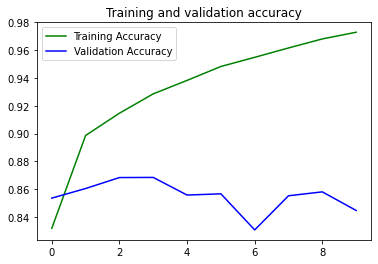

<Figure size 432x288 with 0 Axes>

In [30]:
acc1 = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

epoch_range = range(len(acc))

plt.plot(epoch_range,acc,'g', label = "Training Accuracy")
plt.plot(epoch_range,acc_val,'b',label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show();

In [31]:
np.random.seed(345)
score = model.evaluate(testX, testY, verbose=1)
print("CNN Accuracy: " + str(score[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.3703 - accuracy: 0.9114
CNN Accuracy: 0.9114000201225281


## Conclusion

The difference in accuracies between my svm and my cnn is 0.049. In my tests, it takes about 30 minutes for the svm to run, and about half that time for the cnn to run. There is a definite edge for convolutional neural networks when using a large dataset. If we had less data and features we might see better performance and accuracy for an support vector model.

There were a few problems I faced in coding both of the svm and cnn model. The biggest ones were dealing with the shape of my input data. For the svm I had to reshape the data to fit the svm model. I previously was trying to input 3 dimensional data, when the model required 2 dimensions. Likewise on the cnn I had to reshape the data to be a tensor.

Prior to normalizing the data, I was getting very poor accuracies: 26% and 10%. I thought adding a dropout layer would help as that's a way to reduce overfitting. After I normalized my data, I saw much better prediction values: >89%. I kept in the dropout layer to play with what different values would do. I saw when increasing the dropout value to around 0.25 I saw a decrease in accuracy to about 2%, however when decreasing the dropout value my prediction increased to about 91%. 

Overall we see that using a CNN on a large image dataset is much better than using a support vector model. Moving forward I would like to test this model on other image classication datasets to see how well it performs. I would also like to increase the epochs it runs through to see how the validation validation accuracy changes. 